In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [4]:
GND13Ful = candels[-8]

delz = GND13Ful[0]
nearby = GND13Ful[1][1]
host = GND13Ful[1][2]
lc = GND13Ful[1][3]

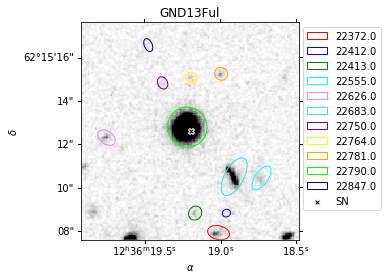

In [8]:
nick = GND13Ful[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Ful[1][0]['RA'],GND13Ful[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.006,val_max = .0525 )

In [7]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

  id    z     z_spec z_peak  l95   u95 
----- ------ ------- ------ ----- -----
22372 2.2700 -1.0000 2.2693 2.051 2.605
22412 2.4500 -1.0000 2.4490 2.313 3.109
22413 0.5400 -1.0000 0.5424 0.268 3.916
22555 1.5700 -1.0000 1.5668 1.111 2.008
22626 1.5600 -1.0000 1.5556 1.179 2.090
22683 2.5600 -1.0000 2.5576 2.488 2.649
22750 2.5800 -1.0000 2.5825 0.618 3.231
22764 1.3600 -1.0000 1.3557 0.083 2.749
22781 1.6500 -1.0000 1.6538 1.099 1.965
22790 0.9400 -1.0000 0.9381 0.864 1.010
22847 1.2200 -1.0000 1.2191 0.143 2.595


## Published as CC specz ~ 0.783

## The host is clear, SN right in body of bright galaxy

## my catalog photz ~ 0.94 = [0.86,1.01] doesn't disagree with the evernote photz ~ 0.803 = [0.60,0.98]

## It doesn't warrant reevaluation

## Wirth et al 2004 has host specz ~ 0.783

## Think this one won't need an update

## https://iopscience.iop.org/article/10.1088/0004-6256/148/1/13/pdf

In [13]:
candels[-9][1][0]

name,nickname,col2,decliner,REPROC,RA,DEC,Host RA,Host DEC,zSN,dzSN,zHost,dzHost,Host Morphology,Host SED Type,PIaz,dPIaz,PIaHost,dPIaHost,galsnidShift,zSNold,dzSNold,zSN Source,zHost Source
str9,str12,str1,str1,str1,str12,str13,str12,str13,str5,str6,str8,str7,str7,str7,str4,str11,str4,str11,str5,str6,str6,str23,str47
GND12Bre,Breckenridge,A,0,y,12:36:55.520,+62:13:58.82,12:36:55.520,+62:13:58.79,1.880,0.001,1.880,0.005,i,SB,0.00,+0.00 -0.00,0.00,+0.00 -0.00,0.00,1.88,0.005,host spec-z,Keck+MOSFIRE (J. Trump)
